In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the already dowloaded train dataset
train = pd.read_csv('train.csv')

In [3]:
#Importing the already dowloaded test dataset
test = pd.read_csv('test.csv')

In [4]:
sample = pd.read_csv('sample_submission.csv')

In [5]:
train.drop(['Name','Cabin'],axis=1,inplace=True)

In [6]:
test.drop(['Name','Cabin'],axis=1,inplace=True)

In [7]:
train.drop('PassengerId',axis=1)
test.drop('PassengerId',axis=1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0
4273,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0
4274,Mars,True,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0
4275,Europa,False,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0


## Visualization of the null values in the training and testing dataset

<AxesSubplot: >

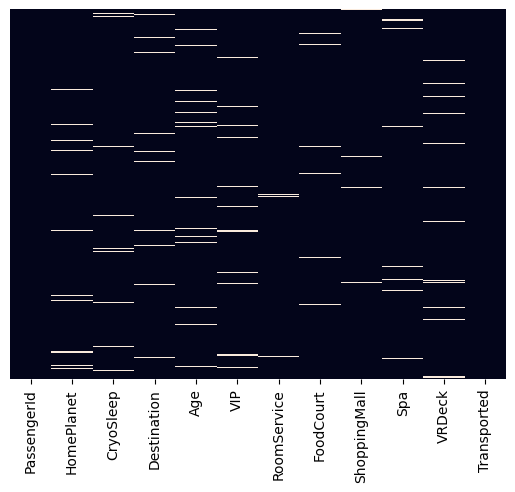

In [8]:
sns.heatmap(train.isnull(),yticklabels=False, cbar= False)

<AxesSubplot: >

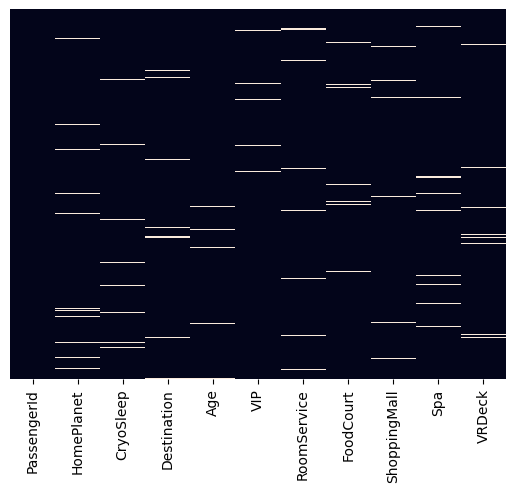

In [9]:
sns.heatmap(test.isnull(),yticklabels=False, cbar= False)

In [10]:
#Filling the null values in the dataset with their respective column means
train.fillna(train.mean(),inplace=True)
test.fillna(test.mean(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_4768\3942098674.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(),inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_4768\3942098674.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(),inplace=True)


## Converting objects to intergers

In [11]:
train['HomePlanet'] = train['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})
train['HomePlanet'].fillna(1, inplace=True)

In [12]:
test['HomePlanet'] = test['HomePlanet'].replace({'Europa':0, 'Earth':1, 'Mars':2})
test['HomePlanet'].fillna(1, inplace=True)

In [13]:
train['Destination'] = train['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})
train['Destination'].fillna(0, inplace=True)

In [14]:
test['Destination'] = test['Destination'].replace({'TRAPPIST-1e':0, '55 Cancri e':1, 'PSO J318.5-22':2})
test['Destination'].fillna(0, inplace=True)

In [15]:
train[['CryoSleep','VIP','Transported']] = (train[['CryoSleep','VIP','Transported']] == True).astype(int)
train[['CryoSleep','VIP']] = (train[['CryoSleep','VIP']] == True).astype(int)

## Visualization of the null values in the training and testing dataset after data cleaning

<AxesSubplot: >

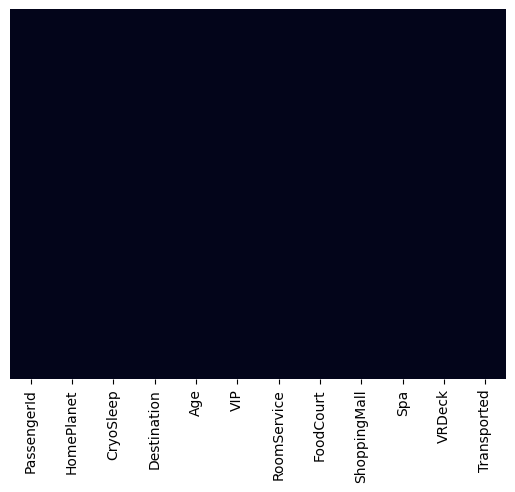

In [16]:
sns.heatmap(train.isnull(),yticklabels=False, cbar= False)

<AxesSubplot: >

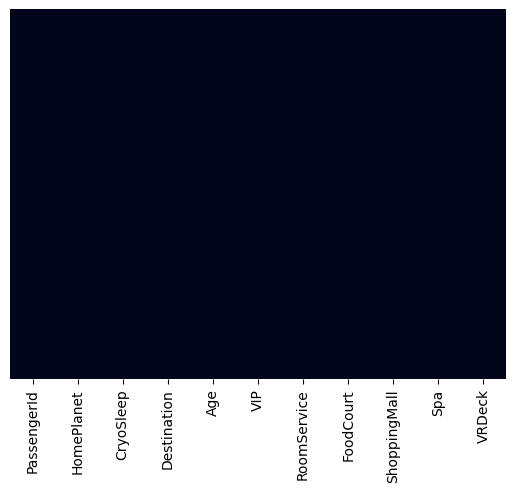

In [17]:
sns.heatmap(test.isnull(),yticklabels=False, cbar= False)

In [18]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0001_01,0.0,0,0.0,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0002_01,1.0,0,0.0,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,0003_01,0.0,0,0.0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,0003_02,0.0,0,0.0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0004_01,1.0,0,0.0,16.0,0,303.0,70.0,151.0,565.0,2.0,1


## Conversion of the data to X and y variables for model formulation

In [19]:
X_train = train.drop('Transported',axis=1)
y_train = train['Transported']
X_test = test

## Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
predictions = pd.DataFrame(lr.predict(X_test), columns = ['Predicted'])

In [24]:
PassengerIdc = pd.DataFrame(test['PassengerId'], columns = ['PassengerId'])

In [25]:
LR_Model_predictions = pd.concat([PassengerIdc,predictions],axis=1)

In [26]:
LR_Model_predictions['Predicted'].value_counts()

1    2556
0    1721
Name: Predicted, dtype: int64

In [27]:
#Accuracy of the Logistic Regression model
LR_Accuracy = lr.score(X_train,y_train)*100
LR_Accuracy

77.40710916829633

## Random Forest Classifier Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
RFC = RandomForestClassifier()

In [30]:
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [31]:
Pred1 = pd.DataFrame(RFC.predict(X_test), columns = ['Predicted'])

In [32]:
RFC_Model_predictions = pd.concat([PassengerIdc,Pred1],axis=1)

In [33]:
RFC_Model_predictions['Predicted'].value_counts()

0    2191
1    2086
Name: Predicted, dtype: int64

In [34]:
#Accuracy of the Random Forest Classifier
RFC_Accuracy = RFC.score(X_train,y_train)*100
RFC_Accuracy

100.0

## Decision Tree Classifier model

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
DTC = DecisionTreeClassifier()

In [37]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [38]:
Pred2 = pd.DataFrame(DTC.predict(X_test), columns = ['Predicted'])

In [39]:
DTC_Model_predictions = pd.concat([PassengerIdc,Pred2],axis=1)

In [40]:
DTC_Model_predictions['Predicted'].value_counts()

1    2231
0    2046
Name: Predicted, dtype: int64

In [41]:
#Accuracy of the Decison Tree Classifier
DTC_Accuracy = DTC.score(X_train,y_train)*100
DTC_Accuracy

100.0

## KNeighbors Classifier model

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
KNN = KNeighborsClassifier(n_neighbors=2)

In [44]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [45]:
Pred3 = pd.DataFrame(KNN.predict(X_test), columns = ['Predicted'])

In [46]:
KNN_Model_predictions = pd.concat([PassengerIdc,Pred3],axis=1)

In [47]:
KNN_Model_predictions['Predicted'].value_counts()

0    2608
1    1669
Name: Predicted, dtype: int64

In [48]:
#Accuracy of the KNeighbors model
Accuracy_score = KNN.score(X_train,y_train)*100
Accuracy_score

86.161279190153

## Sample Submission

In [49]:
DTC_Model_predictions.to_csv('Spaceship Titanic.csv', index=False)
RFC_Model_predictions.to_csv('Spaceship_Titanic.csv', index=False)